1. Carregue a base criando um Pandas DataFrame
2. Exiba algumas informações e dados sobre a base
3. Plote a distribuição e correlação das características da base
4. Divida a base para treinamento e testes
5. Normalize a base
6. Crie o classificador e classifique a base de testes
7. Avalie os resultados para um K fixo
8. Avalie os resultados em função do número de vizinhos K
9. Avalie o classificador utilizando validação cruzada.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = datasets.load_wine()
wine = pd.DataFrame(data= np.c_[data['data'], data['target']],
columns= data['feature_names'] + ['target'])
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [3]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


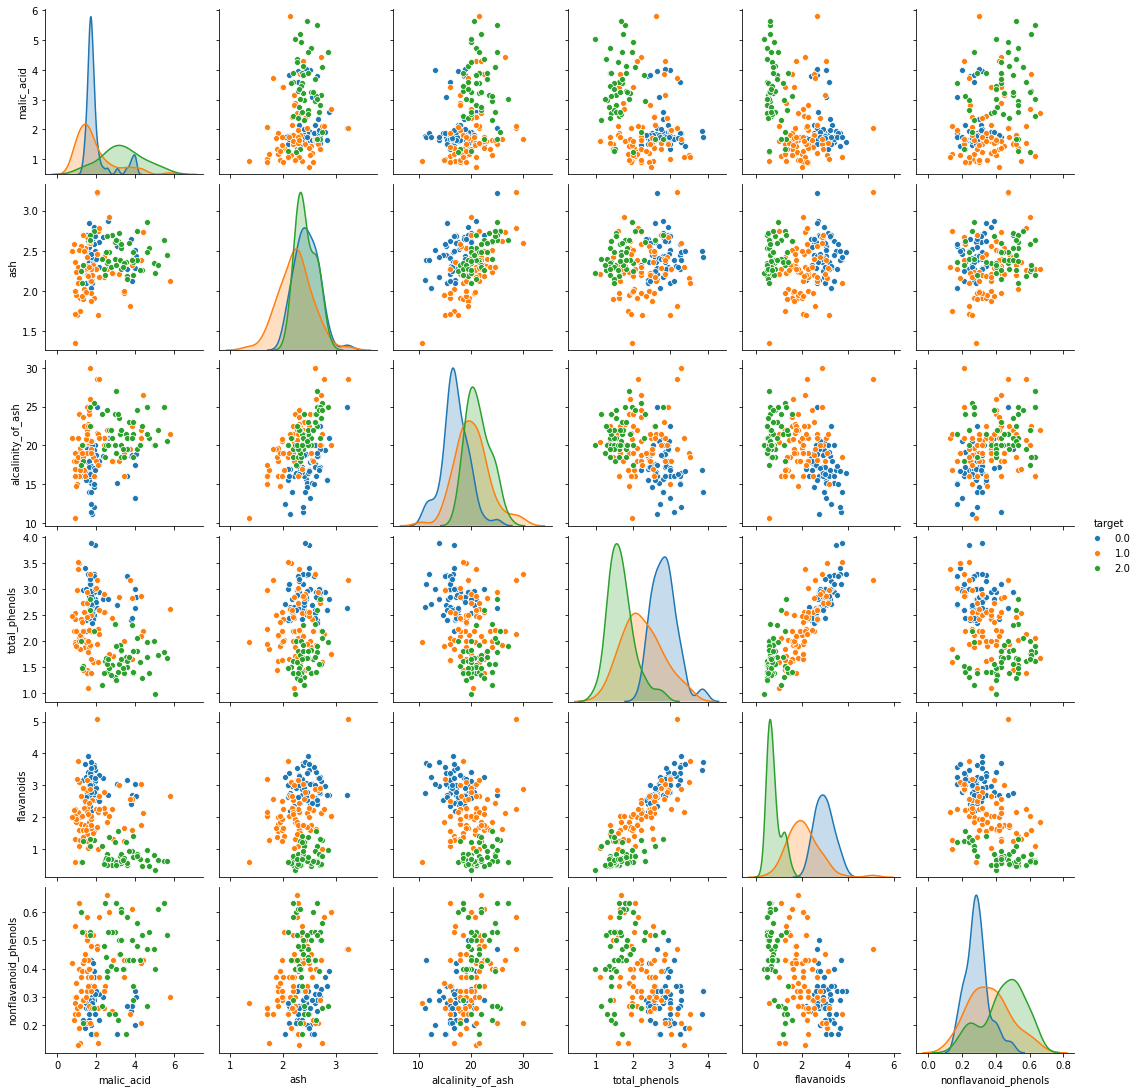

In [5]:
sns.pairplot(wine, vars=["malic_acid", "ash", "alcalinity_of_ash", "total_phenols", "flavanoids",
"nonflavanoid_phenols"], hue='target')

# Percentual alcoólico

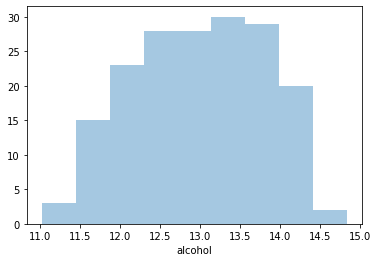

In [6]:
sns.distplot(wine['alcohol'],kde=0)

# Distribuição de álcool por classe de vinho

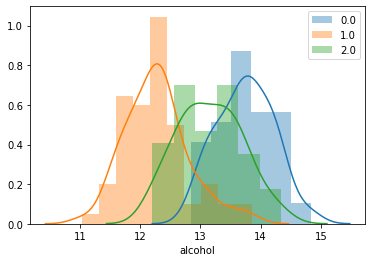

In [7]:
for i in wine.target.unique():
    sns.distplot(wine['alcohol'][wine.target==i],
                 kde=1,label='{}'.format(i))

plt.legend()

In [8]:
y = wine.target
X = wine.drop(["target"], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_ss = scaler.transform(X_train)
X_train_ss = pd.DataFrame(data= X_train_ss, columns= X.columns)

scaler.fit(X_test)
X_test_ss = scaler.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss)

X_train_ss.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02
mean,2.540083e-15,-7.092781e-16,2.946120e-15,-2.820325e-17,2.330125e-16,1.175583e-15,1.779491e-17,-8.590798e-16,7.059765e-16,9.562243e-16,2.381607e-15,1.500592e-15,5.640649e-17
std,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00
min,-2.306809e+00,-1.378117e+00,-3.716829e+00,-2.564800e+00,-2.017542e+00,-1.986279e+00,-1.656120e+00,-1.857267e+00,-2.024834e+00,-1.484221e+00,-2.058812e+00,-1.825712e+00,-1.513362e+00
25%,-8.033849e-01,-6.949718e-01,-5.505861e-01,-6.195865e-01,-8.414766e-01,-8.881715e-01,-8.292216e-01,-7.469998e-01,-5.963829e-01,-8.279394e-01,-7.702359e-01,-1.060608e+00,-7.859520e-01
50%,-2.184314e-02,-4.581481e-01,-2.441756e-02,0.000000e+00,-1.881072e-01,-3.579439e-02,1.168696e-01,-1.918664e-01,-6.556871e-02,-1.946046e-01,6.733848e-02,2.465862e-01,-2.348343e-01
75%,8.730520e-01,6.986447e-01,5.755992e-01,5.763595e-01,4.979307e-01,8.089036e-01,7.947775e-01,6.804861e-01,6.206057e-01,5.201917e-01,6.901502e-01,7.921083e-01,6.161443e-01
max,2.227327e+00,3.094208e+00,3.187980e+00,3.025888e+00,3.993457e+00,2.467583e+00,3.051987e+00,2.345886e+00,3.430037e+00,2.673759e+00,3.224349e+00,1.920893e+00,2.668214e+00


In [10]:
accuracy = {}

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_ss, y_train)
    y_pred = knn.predict(X_test_ss)
    accuracy[i] = accuracy_score(y_true=y_test, y_pred=y_pred)
    print("K = {}, with accuracy = {}".format(i, accuracy[i]))

best_neighbor = max(accuracy, key = accuracy.get)
print("Best K = {}, with accuracy = {}".format(best_neighbor, accuracy[best_neighbor]))


K = 1, with accuracy = 0.9629629629629629
K = 2, with accuracy = 0.9444444444444444
K = 3, with accuracy = 0.9629629629629629
K = 4, with accuracy = 0.9629629629629629
K = 5, with accuracy = 0.9629629629629629
K = 6, with accuracy = 0.9444444444444444
K = 7, with accuracy = 0.9629629629629629
K = 8, with accuracy = 0.9629629629629629
K = 9, with accuracy = 0.9444444444444444
K = 10, with accuracy = 0.9444444444444444
K = 11, with accuracy = 0.9444444444444444
K = 12, with accuracy = 0.9444444444444444
K = 13, with accuracy = 0.9444444444444444
K = 14, with accuracy = 0.9444444444444444
K = 15, with accuracy = 0.9629629629629629
K = 16, with accuracy = 0.9629629629629629
K = 17, with accuracy = 0.9629629629629629
K = 18, with accuracy = 0.9629629629629629
K = 19, with accuracy = 0.9629629629629629
K = 20, with accuracy = 0.9814814814814815
K = 21, with accuracy = 0.9629629629629629
K = 22, with accuracy = 0.9814814814814815
K = 23, with accuracy = 0.9629629629629629
K = 24, with accurac

In [11]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       1.00      0.90      0.95        21
         2.0       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



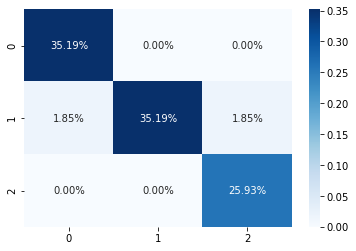

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot=True, 
            fmt='.2%', cmap='Blues')

Text(0, 0.5, 'Erro')

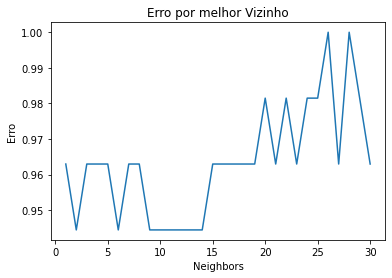

In [13]:
plt.plot(list(accuracy.keys()),
         list(accuracy.values()))

plt.title('Erro por melhor Vizinho')
plt.xlabel('Neighbors')
plt.ylabel('Erro')

In [14]:
knn_cv = KNeighborsClassifier(n_neighbors = best_neighbor)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
print("Neighbors:", best_neighbor)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Neighbors: 26
[0.6        0.68       0.64       0.76       0.70833333]
Accuracy: 0.68 (+/- 0.11)


In [15]:
accuracy_cv = {}
for i in range(1,31):
    knn_cv = KNeighborsClassifier(n_neighbors = i)
    knn_cv.fit(X_train_ss, y_train)
    y_pred = knn_cv.predict(X_test_ss)
    scores = cross_val_score(knn_cv, X_train_ss, y_train, cv=5)
    accuracy_cv[i] = scores.mean()
    print("K = {}, with accuracy = {}".format(i, accuracy_cv[i]))

best_neighbor_cv = max(accuracy_cv, key = lambda k: accuracy_cv[k])
print("Best K = {}, with accuracy = {}".format(best_neighbor_cv, accuracy_cv[best_neighbor_cv]))

K = 1, with accuracy = 0.9193333333333333
K = 2, with accuracy = 0.9273333333333333
K = 3, with accuracy = 0.9353333333333333
K = 4, with accuracy = 0.9353333333333333
K = 5, with accuracy = 0.952
K = 6, with accuracy = 0.9353333333333333
K = 7, with accuracy = 0.968
K = 8, with accuracy = 0.9433333333333334
K = 9, with accuracy = 0.9356666666666665
K = 10, with accuracy = 0.9516666666666665
K = 11, with accuracy = 0.9436666666666665
K = 12, with accuracy = 0.9433333333333334
K = 13, with accuracy = 0.9433333333333334
K = 14, with accuracy = 0.9433333333333334
K = 15, with accuracy = 0.9596666666666666
K = 16, with accuracy = 0.9513333333333334
K = 17, with accuracy = 0.9596666666666666
K = 18, with accuracy = 0.9596666666666666
K = 19, with accuracy = 0.9513333333333334
K = 20, with accuracy = 0.9596666666666666
K = 21, with accuracy = 0.9596666666666666
K = 22, with accuracy = 0.9513333333333334
K = 23, with accuracy = 0.9596666666666666
K = 24, with accuracy = 0.9596666666666666
K =

In [16]:
classifier_cv = KNeighborsClassifier(n_neighbors = best_neighbor_cv)
classifier_cv.fit(X_train_ss, y_train)
y_pred_cv = classifier_cv.predict(X_test_ss)
print(confusion_matrix(y_test, y_pred_cv))
print(classification_report(y_test, y_pred_cv))

[[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       1.00      0.90      0.95        21
         2.0       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



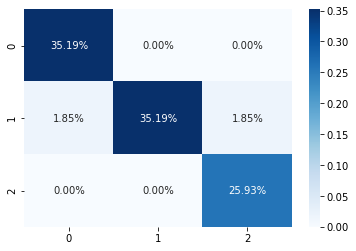

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred_cv)/np.sum(confusion_matrix(y_test, y_pred_cv)), annot=True, 
            fmt='.2%', cmap='Blues')

## Logistic Regression

1. Volte ao notebook onde praticamos classificação de vinhos com kNN
2. Divida a base em treinamento e testes
3. Normalize a base corretamente
4. Crie o modelo de Regressão Logística
5. Utilize validação cruzada para avaliar o comportamento na base de treinamento com a variação de alguns parâmetros (ex.: solver e multiclass)
6. Treine o modelo com a melhor configuração, aplique-o na base de testes e avalie os resultados
7. Compare o resultado com o melhor resultado do kNN

In [18]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [19]:
y = wine.target
X = wine.drop(["target"], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
solvers = ["newton-cg","lbfgs","liblinear","sag","saga"]
mults = ["auto","ovr","multinomial"]

best_accuracy = []

for solv in solvers:
    for mult in mults:
        if solv != "liblinear" or mult != "multinomial":
            logisticRegr = LogisticRegression(solver = solv, multi_class = mult)
            scores = cross_val_score(logisticRegr, X_train, y_train, cv=5)
            accuracy = {
                "solver" : solv,
                "multi_class" : mult,
                "score" : scores.mean()
            }
            best_accuracy.append(accuracy)
            print("Accuracy = {}, Solver = {}, Multi_class = {}".format(scores.mean(), solv, mult))

Accuracy = 0.984, Solver = newton-cg, Multi_class = auto
Accuracy = 0.984, Solver = newton-cg, Multi_class = ovr
Accuracy = 0.984, Solver = newton-cg, Multi_class = multinomial
Accuracy = 0.984, Solver = lbfgs, Multi_class = auto
Accuracy = 0.984, Solver = lbfgs, Multi_class = ovr
Accuracy = 0.984, Solver = lbfgs, Multi_class = multinomial
Accuracy = 0.984, Solver = liblinear, Multi_class = auto
Accuracy = 0.984, Solver = liblinear, Multi_class = ovr
Accuracy = 0.984, Solver = sag, Multi_class = auto
Accuracy = 0.984, Solver = sag, Multi_class = ovr
Accuracy = 0.984, Solver = sag, Multi_class = multinomial
Accuracy = 0.984, Solver = saga, Multi_class = auto
Accuracy = 0.984, Solver = saga, Multi_class = ovr
Accuracy = 0.984, Solver = saga, Multi_class = multinomial
0.984
0.984
0.984
0.984
0.984
0.984
0.984
0.984
0.984
0.984
0.984
0.984
0.984
0.984


In [33]:
logisticRegr = LogisticRegression(solver='newton-cg', multi_class = "auto")
logisticRegr.fit(X_train,y_train)
y_pred = logisticRegr.predict(X_test)
print('accuracy = '+str(score))
print(y_pred)

accuracy = 0.9814814814814815
[0. 0. 2. 0. 1. 0. 1. 2. 1. 2. 0. 2. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 2.
 2. 2. 1. 1. 1. 0. 0. 1. 2. 0. 0. 0. 2. 2. 1. 2. 0. 1. 1. 2. 2. 0. 1. 1.
 2. 0. 1. 0. 0. 2.]


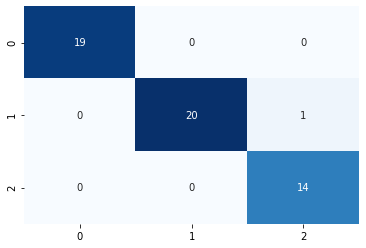

In [37]:
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")